In [290]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from customplot import *

In [291]:
data = pd.read_csv('FDU_Data.csv', sep =",")
print(type(data))
print("Shape will show number of rows and columns in DataFrame (rows,columns):",data.shape)
data.head()

<class 'pandas.core.frame.DataFrame'>
Shape will show number of rows and columns in DataFrame (rows,columns): (1262, 43)


,REC_ID,FILETERM,FTERMA,FILEDATE,COURSE,CRSLEVEL,CDEPT,CNUM,CTITLE,MINCREDS,...,SATVERB,SATMATH,SATWRITE,ACT,Wordcount,ZYBooks_Timeliness,ZYBooks_Curiosity,Weighted_Midterm_Total,Weighted_Final_Total,Word_Count
0,3878,201509,201509,9/1/2015,EGTM_2232,2,EGTM,2232,Mechanical Measurement/Devices,3,...,450,460,480,,,1500.0,700.0,68.6,90.25,296
1,3878,201509,201509,9/1/2015,ENGR_1301,1,ENGR,1301,"Engr Pract, Graphics and Des",3,...,450,460,480,,,1500.0,700.0,68.6,90.25,296
2,3878,201509,201509,9/1/2015,ENWR_1101,1,ENWR,1101,Academic Writing,3,...,450,460,480,,,1500.0,700.0,68.6,90.25,296
3,3878,201509,201509,9/1/2015,MATH_1105,1,MATH,1105,College Algebra,4,...,450,460,480,,,1500.0,700.0,68.6,90.25,296
4,3878,201602,201602,2/1/2016,EGTC_1223,1,EGTC,1223,Introduction to CAD,2,...,450,460,480,,,1500.0,700.0,68.6,90.25,296


In [292]:
df = data[['REC_ID','FILETERM','CUMGPA']]

In [293]:
df.head()

,REC_ID,FILETERM,CUMGPA
0,3878,201509,0
1,3878,201509,0
2,3878,201509,0
3,3878,201509,0
4,3878,201602,2.639


In [294]:
df.shape[0]

1262

In [295]:
df.isnull().any()

REC_ID      False
FILETERM    False
CUMGPA      False
dtype: bool

In [296]:
df['CUMGPA'].str.contains(' ').any()

True

In [297]:
df['CUMGPA'] = df['CUMGPA'].replace(' ', np.nan)

C:\Users\Hemang\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [298]:
df.isnull().any()

REC_ID      False
FILETERM    False
CUMGPA       True
dtype: bool

In [299]:
df = df.dropna()

In [300]:
df.shape[0]

1256

In [301]:
df.duplicated().any()

True

In [302]:
df = df.drop_duplicates()

In [303]:
df.head()

,REC_ID,FILETERM,CUMGPA
0,3878,201509,0
4,3878,201602,2.639
10,3878,201609,3.061
16,3878,201702,3.107
20,5213,201509,0


In [304]:
df.shape[0]

223

In [305]:
df.dtypes

REC_ID       int64
FILETERM     int64
CUMGPA      object
dtype: object

In [306]:
df['CUMGPA'] = df['CUMGPA'].astype(float)

In [307]:
df.dtypes

REC_ID        int64
FILETERM      int64
CUMGPA      float64
dtype: object

In [309]:
filter_terms = df['FILETERM'] >= 201409

In [310]:
df = df[filter_terms]

In [311]:
df.head()

,REC_ID,FILETERM,CUMGPA
0,3878,201509,0.000
4,3878,201602,2.639
10,3878,201609,3.061
16,3878,201702,3.107
20,5213,201509,0.000


In [312]:
terms = {201302:'Spring 2013',201309:'Fall 2013',201402:'Spring 2014',201409:'Fall 2014',201502:'Spring 2015',
         201509:'Fall 2015',201602:'Spring 2016',201609:'Fall 2016',201702:'Spring 2017',201709:'Fall 2017'}

In [313]:
df['FILETERM'] = df['FILETERM'].replace(terms)

In [314]:
df.head()

,REC_ID,FILETERM,CUMGPA
0,3878,Fall 2015,0.000
4,3878,Spring 2016,2.639
10,3878,Fall 2016,3.061
16,3878,Spring 2017,3.107
20,5213,Fall 2015,0.000


In [315]:
df.shape

(220, 3)

In [316]:
import seaborn as sns
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
%matplotlib inline

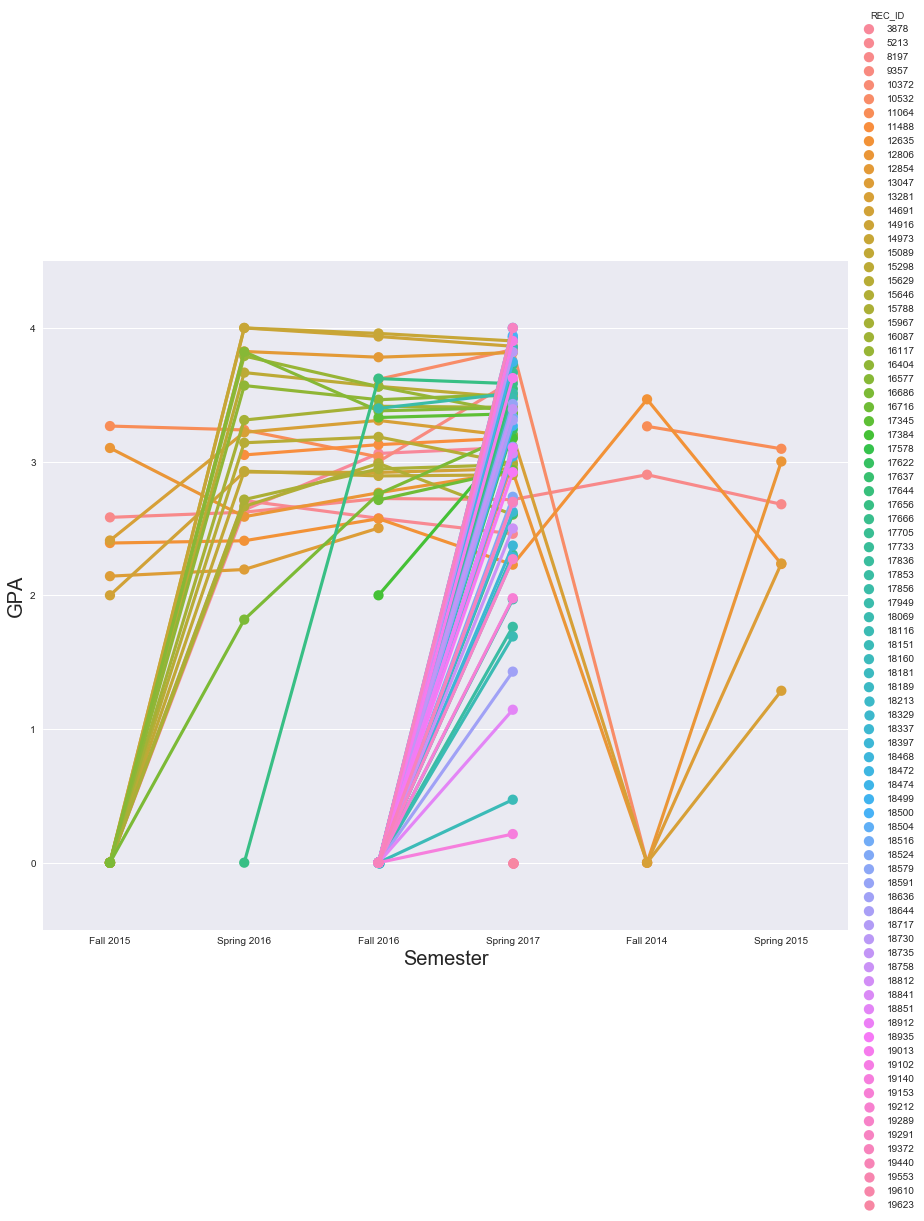

In [317]:
ax = sns.factorplot(x = 'FILETERM', y = 'CUMGPA', hue = 'REC_ID', data = df, legend_out = True ,size= 10, aspect = 1.2,
                   **{'jitter' : True})

plt.xlabel("Semester", fontsize=20)
plt.ylabel("GPA", fontsize=20)
plt.ylim(-0.5,4.5)
plt.show()

In [318]:
x_min,x_max = df['FILETERM'].min(), df['FILETERM'].max()
x_min,x_max

('Fall 2014', 'Spring 2017')

In [319]:
from IPython.display import display, HTML
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [330]:
figure = {
    'data': [],
    'layout':{},
}

In [331]:
figure['layout']['xaxis'] = {'range':[x_min,x_max],'autorange': False, 'title': 'File Term'}
figure['layout']['yaxis'] = {'range':[-0.5,4.5],'autorange': False,'title': 'GPA'}
figure['layout']['hovermode'] = 'closest'

In [322]:
df = df.sort_values(by = ['FILETERM'])

In [323]:
df.head()

,REC_ID,FILETERM,CUMGPA
160,12635,Fall 2014,3.466
191,12806,Fall 2014,0.000
115,11064,Fall 2014,3.264
97,10532,Fall 2014,0.000
244,13047,Fall 2014,0.000


In [324]:
records = df['REC_ID'].unique().tolist()

In [325]:
len(records)

85

In [332]:
for student in records:
    
    dataset_per_student = df[df['REC_ID'] == student] # Extracting data for each student. 

    trace = go.Scatter({
        'x': list(dataset_per_student['FILETERM']),
        'y': list(dataset_per_student['CUMGPA']),
        'connectgaps': True,
        'text': list(dataset_per_student['CUMGPA']),
        'name': student
    })
      
    figure['data'].append(trace)

In [333]:
plot(figure, validate = False)

'file://C:\\Users\\Hemang\\juPyterNotebook_Practice\\Student_Data\\temp-plot.html'

In [156]:
terms = df['FILETERM'].unique().tolist()

In [163]:
gpa = [0,0.5,1,1.5,2,2.5,3,3.5,4,4.5]

In [193]:
data =[ 
    go.Scatter(x = df['FILETERM'], y = df['CUMGPA'], name ="<b>GPA</b>", mode = 'markers', connectgaps = True)
]

In [194]:
layout = go.Layout( hovermode = 'closest')

In [195]:
fig = go.Figure(data = data, layout = layout)

In [196]:
plot(fig, validate = False)

'file://C:\\Users\\Hemang\\juPyterNotebook_Practice\\Student_Data\\temp-plot.html'

In [129]:
df_tr = df

In [130]:
df_tr = pd.get_dummies(df_tr, columns=['FILETERM'])

In [131]:
df_tr.head()

,REC_ID,CUMGPA,FILETERM_Fall 2015,FILETERM_Fall 2016,FILETERM_Spring 2016,FILETERM_Spring 2017
0,3878,0.000,1,0,0,0
4,3878,2.639,0,0,1,0
10,3878,3.061,0,1,0,0
16,3878,3.107,0,0,0,1
20,5213,0.000,1,0,0,0


In [132]:
clmns=['FILETERM_Fall 2015','FILETERM_Fall 2016','FILETERM_Spring 2016','FILETERM_Spring 2017']

In [133]:
from scipy import stats

In [134]:
df_tr_std = stats.zscore(df_tr[clmns])

In [135]:
df_tr_std

array([[ 2.89984326, -0.79367579, -0.36214298, -0.80178373],
       [-0.34484623, -0.79367579,  2.76134025, -0.80178373],
       [-0.34484623,  1.25996032, -0.36214298, -0.80178373],
       [-0.34484623, -0.79367579, -0.36214298,  1.24721913],
       [ 2.89984326, -0.79367579, -0.36214298, -0.80178373],
       [-0.34484623, -0.79367579,  2.76134025, -0.80178373],
       [-0.34484623,  1.25996032, -0.36214298, -0.80178373],
       [-0.34484623, -0.79367579, -0.36214298,  1.24721913],
       [ 2.89984326, -0.79367579, -0.36214298, -0.80178373],
       [-0.34484623, -0.79367579,  2.76134025, -0.80178373],
       [-0.34484623,  1.25996032, -0.36214298, -0.80178373],
       [-0.34484623, -0.79367579, -0.36214298,  1.24721913],
       [-0.34484623,  1.25996032, -0.36214298, -0.80178373],
       [-0.34484623, -0.79367579, -0.36214298,  1.24721913],
       [-0.34484623,  1.25996032, -0.36214298, -0.80178373],
       [-0.34484623, -0.79367579, -0.36214298,  1.24721913],
       [-0.34484623,  1.

In [109]:
del df_tr['REC_ID']

In [143]:
kmeans = KMeans(n_clusters = 6, random_state = 0).fit(df_tr_std)
lables = kmeans.labels_

In [144]:
df_tr['clusters'] = lables

In [145]:
df_tr.head()

,REC_ID,CUMGPA,FILETERM_Fall 2015,FILETERM_Fall 2016,FILETERM_Spring 2016,FILETERM_Spring 2017,clusters
0,3878,0.000,1,0,0,0,3
4,3878,2.639,0,0,1,0,5
10,3878,3.061,0,1,0,0,2
16,3878,3.107,0,0,0,1,0
20,5213,0.000,1,0,0,0,3


In [113]:
clmns.extend(['clusters'])

In [139]:
df_tr[clmns].groupby(['clusters']).mean()

KeyError: 'clusters'

In [121]:
del clmns[-1]

In [146]:
P =  pd_centers(featuresUsed=clmns, centers=kmeans.cluster_centers_)

In [147]:
P

,FILETERM_Fall 2015,FILETERM_Fall 2016,FILETERM_Spring 2016,FILETERM_Spring 2017,prediction
0,-0.344846,-0.793676,-0.362143,1.247219,0
1,-0.344846,-0.793676,-0.362143,1.247219,1
2,-0.344846,1.259960,-0.362143,-0.801784,2
3,2.899843,-0.793676,-0.362143,-0.801784,3
4,-0.344846,-0.793676,2.761340,-0.801784,4
5,-0.344846,-0.793676,2.761340,-0.801784,5


In [124]:
%matplotlib inline

C:\Users\Hemang\juPyterNotebook_Practice\Student_Data\customplot.py:31: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.
  parallel_coordinates(data, 'prediction', color = my_colors, marker='o')


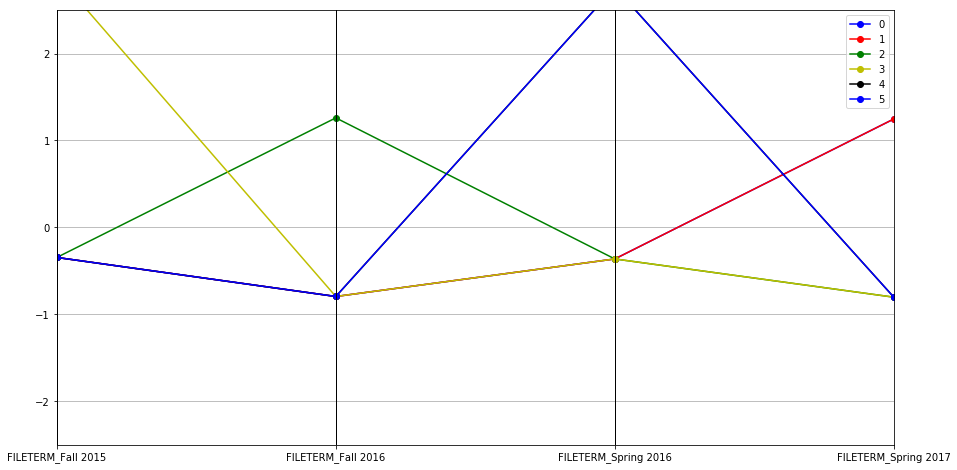

In [148]:
parallel_plot(P)